<a href="https://colab.research.google.com/github/AnHaiTrinh/handson-ml/blob/main/ModelTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Linear Regression

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Text(0, 0.5, 'y')

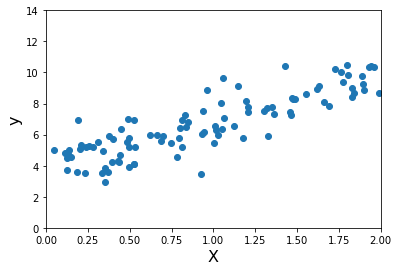

In [3]:
plt.scatter(X, y)
plt.axis([0, 2, 0, 14])
plt.xlabel("X", fontsize=16)
plt.ylabel("y", fontsize=16)

In [4]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[3.86546243],
       [2.96189369]])

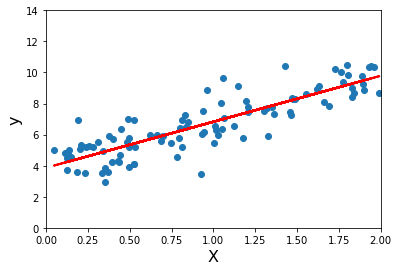

In [6]:
plt.scatter(X, y)
plt.axis([0, 2, 0, 14])
plt.xlabel("X", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.plot(X, X_b.dot(theta_best), 'r-', linewidth=2)

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [8]:
lin_reg.intercept_, lin_reg.coef_

(array([3.86546243]), array([[2.96189369]]))

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[3.86546243],
       [2.96189369]])

In [10]:
eta = 0.1
n_iter = 1000
m = 100
theta = np.random.randn(2, 1)
for iter in range(n_iter):
    grad = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= eta * grad

In [11]:
theta

array([[3.86546243],
       [2.96189369]])

In [12]:
n_epochs = 50
t0, t1 = 5, 50
m = 100
eta = 0.1

In [13]:
def learning_schedule(t):
    return t0 / (t + t1)

In [14]:
theta = np.random.randn(2, 1)

In [15]:
for epoch in range(n_epochs):
    for iter in range(m):
       random_idx = np.random.randint(m)
       xi = X_b[random_idx: random_idx + 1]
       yi = y[random_idx: random_idx + 1]
       grad = 2 * xi.T.dot(xi.dot(theta) - yi)
       eta = learning_schedule(epoch * m + iter)
       theta -= eta * grad

In [16]:
theta

array([[3.84688659],
       [2.94026565]])

In [17]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.84245362]), array([2.93769325]))

### Polynomial Regression

In [19]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

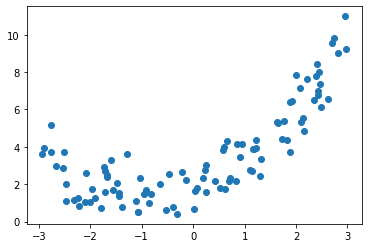

In [20]:
plt.scatter(X, y)

In [21]:
poly_feats = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feats.fit_transform(X)

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [23]:
lin_reg.coef_

array([[0.98761716, 0.54185998]])

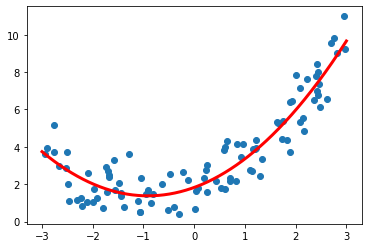

In [24]:
plt.scatter(X, y)
x_axis = np.linspace(-3, 3, 1000)
y_axis = np.ones(1000) * lin_reg.intercept_ + x_axis * lin_reg.coef_[0][0] + x_axis ** 2 * lin_reg.coef_[0][1]
plt.plot(x_axis, y_axis, 'r', linewidth=3)

In [25]:
def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_err, val_err = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_err.append(mean_squared_error(y_train[:m], y_train_pred))
        val_err.append(mean_squared_error(y_val, y_val_pred))
    plt.plot(np.sqrt(train_err), 'r-+', linewidth=2, label='Train')
    plt.plot(np.sqrt(val_err), 'b-', linewidth=2, label='Validation')
    plt.xlabel("Training set size", fontsize=16)
    plt.ylabel("RMSE", fontsize=16)
    plt.axis([0, 100, 0, 10])
    plt.legend(loc='upper right', fontsize=12)

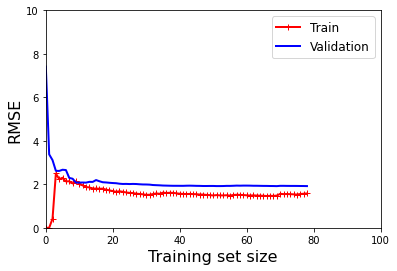

In [26]:
plot_learning_curve(lin_reg, X, y)

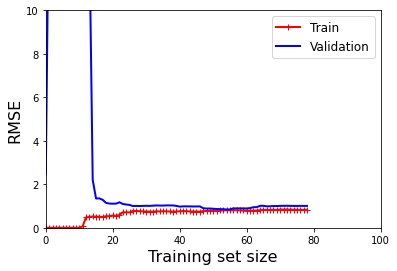

In [27]:
poly_10 = PolynomialFeatures(degree=10, include_bias=False)
X_10 = poly_10.fit_transform(X)
plot_learning_curve(lin_reg, X_10, y)

### Regularization

In [28]:
X = 3 * np.random.rand(20, 1)
y = 1 + 0.5 * X + np.random.randn(20, 1) / 1.5

In [29]:
def plot_ridge(model_class, X, y, alphas):
    plt.scatter(X, y)
    plt.axis([0, 3, 0, 4])
    for alpha, style in zip(alphas, ('g--', 'r:', 'b-')):
        new_model = model_class(alpha)
        new_model.fit(X, y)
        X_new = np.array([[0], [3]])
        y_new = new_model.predict(X_new)
        plt.plot(X_new, y_new, style, label=r"$\alpha = {}$".format(alpha))
    plt.legend(loc='upper right')
    plt.xlabel('X', fontsize=16)
    plt.ylabel('y', fontsize=16)

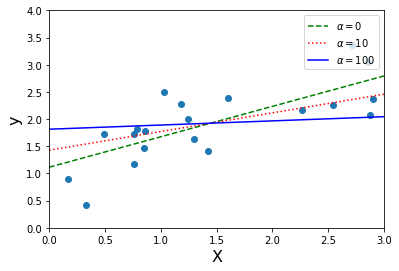

In [30]:
plot_ridge(Ridge, X, y, (0, 10, 100))

In [31]:
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.952546]])

In [32]:
sgd_reg = SGDRegressor(penalty='l2', max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.85368807])

In [33]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.94760553])

In [34]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.94939252])

### Logistic Regression

In [35]:
iris = datasets.load_iris()

In [36]:
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

In [37]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [38]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_pred = log_reg.predict_proba(X_new)

In [39]:
decision_boundary = X_new[y_pred[:, 1] >= 0.5][0]

(-0.05, 3.0, 0.0, 1.02)

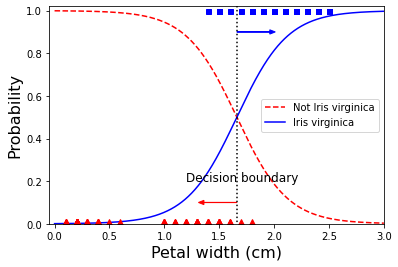

In [40]:
plt.plot(X_new, y_pred[:, 0], 'r--', label='Not Iris virginica')
plt.plot(X_new, y_pred[:, 1], 'b-', label='Iris virginica')
plt.plot(X[y == 0], y[y == 0], 'r^', markersize=10)
plt.plot(X[y == 1], y[y == 1], 'bs', markersize=5)


plt.plot([decision_boundary, decision_boundary], [-0.05, 1.05], 'k:')
plt.text(decision_boundary + 0.05, 0.2, "Decision boundary", fontsize=12, color='k', ha='center')
plt.arrow(decision_boundary, 0.1, -0.3, 0, head_width=0.02, head_length=0.05, fc='r', ec='r')
plt.arrow(decision_boundary, 0.9, 0.3, 0, head_width=0.02, head_length=0.05, fc='b', ec='b')

plt.xlabel("Petal width (cm)", fontsize=16)
plt.ylabel("Probability", fontsize=16)
plt.legend(loc='center right', fontsize=10)
plt.axis([-0.05, 3, 0, 1.02])

In [41]:
X = iris['data'][:, 2:]
y = (iris['target'] == 2).astype(np.int)

In [42]:
log_reg = LogisticRegression(solver='lbfgs', C=10**10, random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=10000000000, random_state=42)

In [43]:
x_0, x_1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1, 1),
    np.linspace(0.8, 2.7, 200).reshape(-1, 1)
)
X_new = np.c_[x_0.ravel(), x_1.ravel()]
y_proba = log_reg.predict_proba(X_new)

In [44]:
zz = y_proba[:, 1].reshape(x_0.shape)

(2.9, 7.0, 0.8, 2.7)

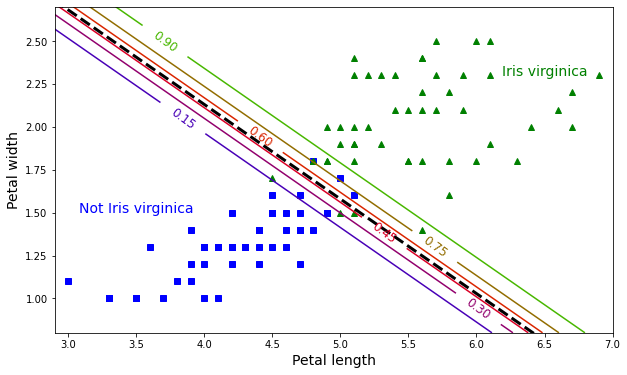

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs")
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^")

contour = plt.contour(x_0, x_1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

### Softmax Regression

In [46]:
X = iris['data'][:, (2, 3)]
y = iris['target']
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [47]:
softmax_reg.predict([[2.5, 3]])

array([0])

In [48]:
softmax_reg.predict_proba([[2.5, 3]])

array([[0.5339383 , 0.36676229, 0.09929941]])

In [49]:
x0, x1 = np.meshgrid(
    np.linspace(0, 7, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1)
)
X_new = np.c_[x0.ravel(), x1.ravel()]
zz1 = softmax_reg.predict_proba(X_new)[:, 1].reshape(x0.shape)
zz = softmax_reg.predict(X_new).reshape(x0.shape)

(0.0, 7.0, 0.0, 3.5)

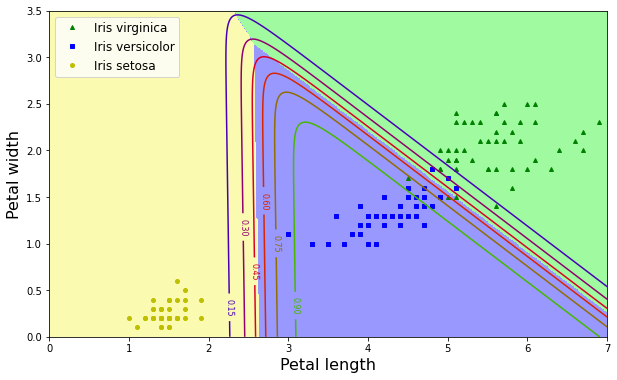

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(X[y == 2, 0], X[y == 2, 1], 'g^', label='Iris virginica', markersize=4)
plt.plot(X[y == 1, 0], X[y == 1, 1], 'bs', label='Iris versicolor', markersize=4)
plt.plot(X[y == 0, 0], X[y == 0, 1], 'yo', label='Iris setosa', markersize=4)

custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=8)
plt.xlabel('Petal length', fontsize=16)
plt.ylabel('Petal width', fontsize=16)
plt.legend(loc='upper left', fontsize=12)
plt.axis([0, 7, 0, 3.5])